In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [ ]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
data = pd.read_csv('GOOG.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-20,542.117981,548.528992,541.968567,548.255005,548.255005,6547651
1,2013-12-23,551.851501,555.816650,550.496582,555.467957,555.467957,3456106
2,2013-12-24,555.403198,555.537720,551.981018,553.844055,553.844055,1473904
3,2013-12-26,554.924988,557.410706,552.274963,556.643555,556.643555,2685629
4,2013-12-27,557.908813,558.048279,554.392029,557.111816,557.111816,3151167
...,...,...,...,...,...,...,...
2008,2021-12-13,2968.879883,2971.250000,2927.199951,2934.090088,2934.090088,1205200
2009,2021-12-14,2895.399902,2908.840088,2844.850098,2899.409912,2899.409912,1238900
2010,2021-12-15,2887.320068,2950.344971,2854.110107,2947.370117,2947.370117,1364000
2011,2021-12-16,2961.540039,2971.030029,2881.850098,2896.770020,2896.770020,1370000


In [ ]:
# Create a new dataframe with only the 'Close column 
data = data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1913

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02261358],
       [0.02547249],
       [0.02482884],
       ...,
       [0.97351947],
       [0.95346377],
       [0.93732809]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 31:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.02261358, 0.02547249, 0.02482884, 0.02593844, 0.02612404,
       0.02435894, 0.02658013, 0.02508157, 0.02347837, 0.02591082,
       0.03016362, 0.03063156, 0.02846171, 0.02844986, 0.02702831,
       0.03224464, 0.03209064, 0.03359115, 0.03246774, 0.03506801,
       0.03532863, 0.03435723, 0.02719612, 0.02273401, 0.02703423,
       0.02385745, 0.02947851, 0.03847776, 0.02909154, 0.03002542])]
[0.031020517417675864]

[array([0.02261358, 0.02547249, 0.02482884, 0.02593844, 0.02612404,
       0.02435894, 0.02658013, 0.02508157, 0.02347837, 0.02591082,
       0.03016362, 0.03063156, 0.02846171, 0.02844986, 0.02702831,
       0.03224464, 0.03209064, 0.03359115, 0.03246774, 0.03506801,
       0.03532863, 0.03435723, 0.02719612, 0.02273401, 0.02703423,
       0.02385745, 0.02947851, 0.03847776, 0.02909154, 0.03002542]), array([0.02547249, 0.02482884, 0.02593844, 0.02612404, 0.02435894,
       0.02658013, 0.02508157, 0.02347837, 0.02591082, 0.03016362,
       0.03063156, 0.02846171, 0

# LSTM (128, 64)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.core import Dense, Activation, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1883/1883 [==============================] - 21s 7ms/step - loss: 9.6476e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 30: , :]
# Create the data sets x_test and y_test
x_test = []

y_test = dataset[training_data_len:, :]
y_test1 = scaled_data[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions1 = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions- y_test1) ** 2)))
print(rmse)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions1 - y_test) ** 2)))
rmse

0.02376425007244892


59.95668852651385

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


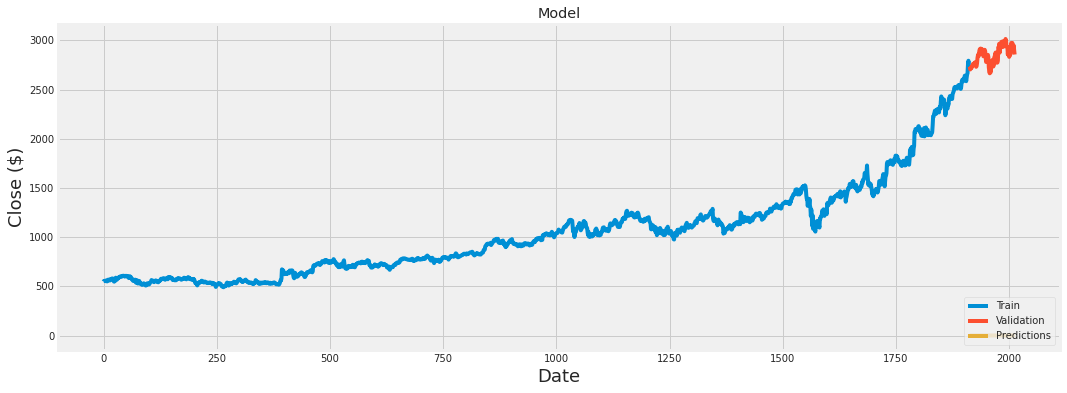

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

GRU (128, 32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout

# Build the LSTM model
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(GRU(32, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1883/1883 [==============================] - 14s 5ms/step - loss: 5.5384e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 30: , :]
# Create the data sets x_test and y_test
x_test = []

y_test = dataset[training_data_len:, :]
y_test1 = scaled_data[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions1 = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions- y_test1) ** 2)))
print(rmse)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions1 - y_test) ** 2)))
rmse

0.058747223104255515


148.21794756686452

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


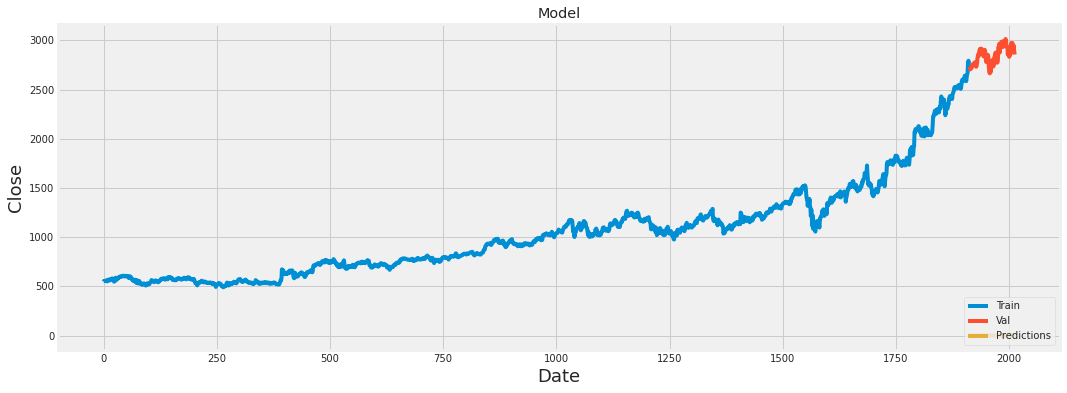

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout

# Build the LSTM model
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1883/1883 [==============================] - 16s 7ms/step - loss: 9.0737e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 30: , :]
# Create the data sets x_test and y_test
x_test = []

y_test = dataset[training_data_len:, :]
y_test1 = scaled_data[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions1 = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions- y_test1) ** 2)))
print(rmse)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions1 - y_test) ** 2)))
rmse

0.02368103704546587


59.74672727026376

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


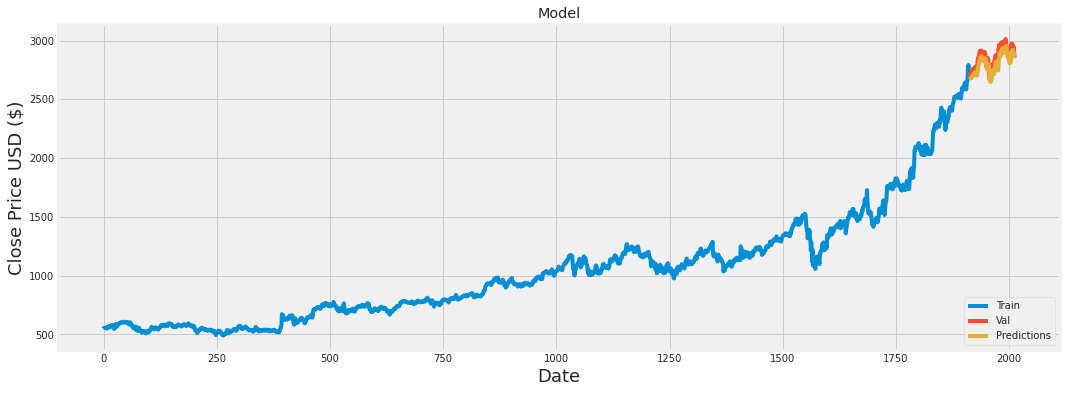

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras import layers


# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1883/1883 [==============================] - 19s 6ms/step - loss: 0.0020


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 30: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.19452015672893638


490.7701364690594

In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense

# Building the model
model = Sequential()
# Adding a Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64,return_sequences=True, dropout=0.5, input_shape=(x_train.shape[1], x_train.shape[-1]))))
model.add(Bidirectional(LSTM(20, dropout=0.5)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

model.fit(x_train, y_train, batch_size=1, epochs=1)

1883/1883 [==============================] - 51s 21ms/step - loss: 0.0037


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 30: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

340.8379126241844